# India Wheater Visualization

<div align= 'center'>
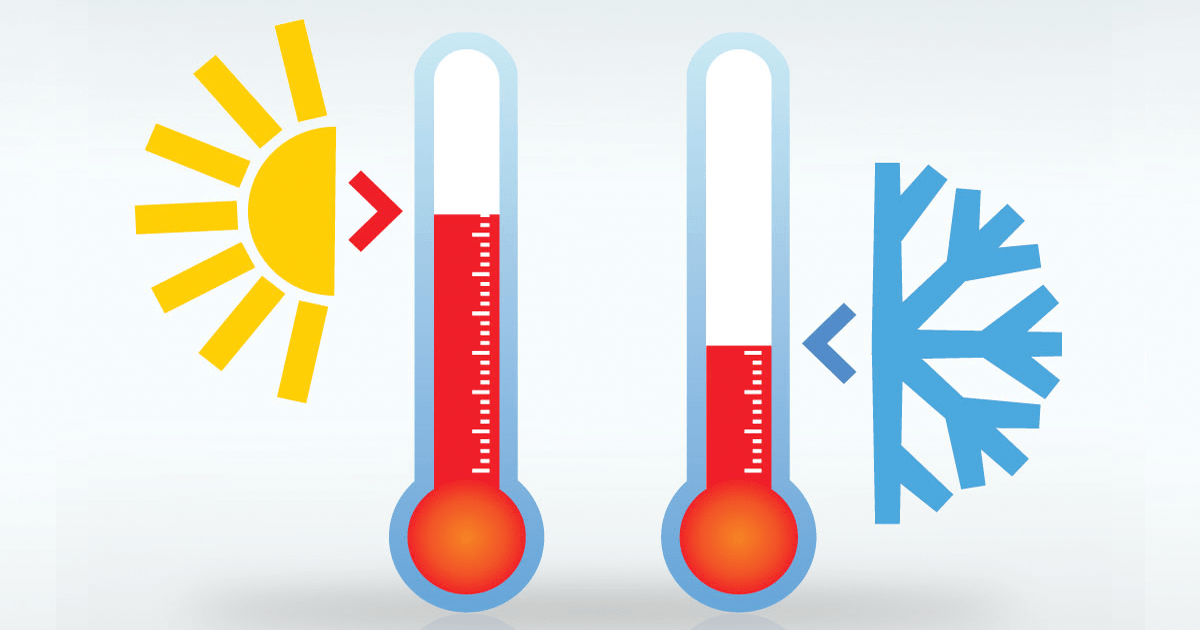
</div>

# Introduction

In this notebook we will analyze the 'India Wheater' dataset, and generate insights into India's temperature and seasons.

## Menu

- [Imports](#Imports)
- [Data Cleaning](#Data-Cleaning)
- [Visualization](#Visualization)



# Imports

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [ ]:
df = pd.read_csv("../input/weather-data-in-india-from-1901-to-2017/Weather Data in India from 1901 to 2017.csv")

df.head()

In [ ]:
df = df.drop(columns= ['Unnamed: 0'])

**First let's create another dataframe to make the data easier to visualize. We are going to organize the data into a time series.**

In [ ]:
dates = {}

i = 0
for y in df['YEAR']:
    for m in df.columns[1:]:
        
        dat = str(m) + '/' + str(y)
        dates[dat] = df[m][i]
    i += 1
    
dates = pd.DataFrame(pd.Series(dates).reset_index())
dates.columns = ['date', 'temp']

dates['date'] = pd.to_datetime(dates['date'], format= '%b/%Y')
dates['year'] = dates['date'].dt.year
dates['month'] = dates['date'].dt.month_name()

dates.head()

## Seasons Categories

According to my google searches, seasons in India are divided into the following categories:

- Winter (November - February)
- Summer (March - May)
- Monsoon (June -  October)

ps: i had never heard of monsoon, i found it is like another summer, but with milder temperatures.

In [ ]:
dates['season'] = np.empty(shape= dates.shape[0])

i = 0
for m in dates['month']:
    season = None
    if m in ['November', 'December', 'January', 'February']:
        season = 'winter'
    elif m in ['March', 'April', 'May']:
        season = 'summer'
    elif m in ['June', 'July', 'August', 'September', 'October']:
        season = 'monsoon'
    
    dates['season'][i] = season
    i += 1

dates.head()

# Visualization

## Temperature per Month

Let's see how temperatures behave according to months.

In [ ]:
sns.relplot(x= dates['date'], y= dates['temp'], hue= dates['month'], legend= True)
plt.show()

- **Insights**
    - Here we can see that temperatures are well defined according to the month.
    - You can also notice an increase in the average temperature over the years.


In [ ]:
sns.relplot(data= dates, x= 'year', y= 'temp', col= 'month')
plt.show()

- **Insights**
    - We can see more clearly that the average temperature starts low in January and rises until it peaks in May, then slowly declines until October, to have sharper drops from November to January.
    - The seasons are well divided, with characteristic temperatures.

## Seasons Visualization

In [ ]:
sns.relplot(x= dates['year'], y= dates['temp'], legend= False, col = dates['season'], kind= 'line')
plt.title('Temperatures per Season', size= 20)
plt.show()

- **Insights**
    - Temperatures reach their lowest in winter and highest in summer.
    - Summer and monsoon have very similar temperatures, with the difference that summer has greater variation.
    - In all seasons, the average temperature has increased over the years, a sign that global warming is real.

In [ ]:
plt.figure(figsize= (12, 6))
sns.boxplot(data= dates, x= 'month', y='temp', hue= 'season')
plt.title('Temperatures Distibuition per Month', size= 20)
plt.xticks(rotation= 30)
plt.show()

- **Insights**
    - The temperature reaches its minimum in January.
    - The temperature reaches its maximum in May.
    - Monsoon is the season with the smallest temperature variation.